# <center>3.4 - Feature Selection</center>

### Зачем вообще заниматься отбором признаков?
Как можно увидеть в уроках про Feature engeneering и автоматическую генерацию признаков - мы можем достаточно быстро нагенерировать большое количество фичей, особенно, в автоматическом режиме. Зачем же тогда часть из них выкидывать? <br> 
Основных причин две:
* Первая, лежащая на поверхности, - если фичей очень много, то данные могут перестать помещаться в память; может существенно увеличиться время обучения модели, тем более если мы захотим протестировать несколько разных алгоритмов или ансамбль. Особенно, в условиях ограничения платформ на длительность одной сессии (в Kaggle 12 часов).
* Но главная причина состоит в том, что с увеличением количества признаков часто падает точность предсказания модели. Особенно, если в данных большое количество мусорных фичей (почти не коррелирующих с таргетом). Некоторые алгоритмы при сильном увеличении числа признаков, вообще, перестают адекватно работать. И здравствуй, старый добрый оверфит!

## Методы фильтрации признаков.
Методы отбора признаков (filter methods) делятся на 3 группы:
* Filter methods
* Wrapper methods
* Embedded methods

**Filter methods (методы фильтрации)**<br>
Эти методы основаны на статистических методах и, как правило, рассматривают каждый признак независимо. Позволяют оценить и ранжировать фичи по значимости, за которую принимается степень корреляции этой фичи с целевой переменной. Основное приемущество этой группы методов низкая цена вычислений, которая линейно зависит от общего количества признаков.  Они значительно быстрее и wrapper и embedded методов. К тому же, они хорошо работают даже тогда, когда число признаков превышает количество примеров в обучающей выборке (чем далеко не всегда могут похвастаться методы других категорий). <br>
Основной недостаток этих методов состоит в том, что они рассматривают каждый признак изолированно от других, поэтому они не такие точные, но могут быстро отранжировать признаки. Правда найденный топ фичей далеко не всегда будет подмножеством, на котором модель покажет наилучшую точность. Например, если взять feature importance, обучив модель бустинга 1 раз, при наличии большого числа сильноскоррелированных признаков они поделят importance между собой (т.к. дерево выберет не одну из них, а все, а частота выбора маленькая) и упадут вниз в топе по важности. Далее если мы возьмем топ-N, то мы их обрежем а в топе останется мусор. Правда прогресс не стоит на месте и появляются filter методы, которые пытаются решить эту проблему разными способами - на основе взаимной информации признаков, или учитывая избыточность признаков (метод mRmR  - минимальная избыточность при максимальной релевантности).<br>
Некоторые из таких методов реализованы в разделе `sklearn.feature_selection` библиотеки scikit-learn - например, `SelectKBest`, `chi2` и пр. Так же feature importance в библиотеках градиентых бустингов, можно сказать, основаны на этой методике, но в той же мере их можно отнести и к встроенным методам - дискуссионный вопрос.<br>
<br>
**Embedded methods (встроенные методы)**<br>
Куда же они встроены? А прямо в процесс обучения модели. Эти модели позволяют не разделять процессы тренировки и отбора признаков, т.е. во время обучения модели проводить отсев и на выходе получить модель, которая знает на какие признаки обращать больше внимания, а какие мусор. Эти методы требуют меньше вычислений, чем wrapper методы, но больше, чем методы фильтрации. Как вы уже, наверное, догадались, основными методами из этой группы являются наши "старые знакомые" - регуляризации (например, LASSO- и Ridge- регрессии), свои регуляризации есть так же в бустингах и нейросетях.<br>
Минусы у регуляризаций тоже есть: хотя бы раз придется обучить модель на всех признаках и посмотреть коэффициенты, что не всегда удобно и осуществимо. Так же обученная на всех признаках модель медленнее будет работать при инференсе. Но в общем случае этот метод способен лучше уловить взаимозависимости переменных, чем методы фильтрации.<br>
<br>
**Wrapper methods (оборачивающие методы, методы-обертки?? не понятно как лучше перевести - пишите свои варианты в комментарии)**<br>
Что же они заворачивают\оборачивают? А оборачивают они обучение модели в последовательное удаление (backward feature selection) или добавление (forward fs) признаков. Сразу скажем, что в соревновательном DS вам чаще всего придется пользоваться одним из методов этой группы. Backward feature selection лучше отслеживает взаимосвязи между фичами, но он гораздо дороже вычислительно.<br>
Основной недостаток всех wrapper методов это долгое время вычислений. К тому же, в случае большого количества признаков и небольшого размера тренировочного датасета эти методы имеют опасность переобучения.<br>
Примеры таких методов: RFE (recursive feature elimination) из библиотеки scikit-learn, Boruta из пакета BorutaPy (для алгоритма RandomForest) и др.<br>

Порой бывает трудно однозначно определить к какой группе относится тот или иной метод или это вообще гибрид, который сочетает в себе несколько методов. Например, при использовании библиотеки градиентного бустинга CatBoost можно потрогать методы всех 3-х типов или их сочетания: если взять просто feature importance c дефолтными параметрами и отключенной регуляризацией, то получим filter метод; если добавим в модель параметры, отвечающие за регуляризацию, то получим своеобразный гибрид - вроде filter метод, но вместе с тем с регуляризацией (embedded метод); если применим встроенную в CatBoost функцию `feature_selection()`, то будет работать wrapper-метод с backward fs.<br>
<br>
ПЕРЕХОДИМ К ПРАКТИКЕ!

План:
1. лассо


In [ ]:
!pip install catboost shap

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## <center>Feature importance</center>

In [43]:
# Загружаем датасет из quickstart'а
#path = 'https://stepik.org/media/attachments/lesson/681942/quickstart_train.csv'
rides_info = pd.read_csv('../data/quickstart_train.csv')
rides_info.head()

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class,mean_rating,distance_sum,rating_min,speed_max,user_ride_quality_median,deviation_normal_count,user_uniq
0,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,15634.32,another_bug,44.660920,1.214131e+07,0.1,180.855726,0.023174,174,170
1,O41613818T,VW Polo VI,economy,petrol,3.90,2015,78218,2021,2791.94,electro_bug,49.862069,1.803909e+07,0.0,187.862734,12.306011,174,174
2,d-2109686j,Renault Sandero,standart,petrol,6.30,2012,23340,2017,2263.93,gear_stick,44.005747,1.588366e+07,0.1,102.382857,2.513319,174,173
3,u29695600e,Mercedes-Benz GLC,business,petrol,4.04,2011,1263,2020,1518.06,engine_fuel,49.344828,1.651883e+07,0.1,172.793237,-5.029476,174,170
4,N-8915870N,Renault Sandero,standart,petrol,4.70,2012,26428,2017,825.78,engine_fuel,50.603448,1.398317e+07,0.1,203.462289,-14.260456,174,171


In [44]:
drop_cols = ['car_id', 'target_class', 'target_reg']
cat_cols = ['car_type', 'fuel_type', 'model']

Для примера возьмем библиотеку градиентного бустинга CatBoost

In [45]:
from catboost import CatBoostRegressor, Pool, CatBoostClassifier
from sklearn.model_selection import train_test_split
#import shap

In [46]:
X = rides_info.drop(drop_cols, axis=1)
y = rides_info['target_reg'].fillna(0)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
model = CatBoostRegressor(cat_features=cat_cols,
                          thread_count=-1,
                         eval_metric='RMSE')
model.fit(X_train, y_train, 
          eval_set=(X_test, y_test),
          verbose=10, plot=False, 
          early_stopping_rounds=100)

Learning rate set to 0.056174
0:	learn: 6340.1878850	test: 5137.0529656	best: 5137.0529656 (0)	total: 1.17ms	remaining: 1.17s
10:	learn: 5351.9639197	test: 4376.5751633	best: 4376.5751633 (10)	total: 10.1ms	remaining: 905ms
20:	learn: 4729.1675619	test: 4123.4906096	best: 4123.4906096 (20)	total: 19ms	remaining: 887ms
30:	learn: 4273.0360764	test: 4144.4352850	best: 4096.9278935 (25)	total: 27.8ms	remaining: 870ms
40:	learn: 3921.0172439	test: 4203.3496460	best: 4096.9278935 (25)	total: 37.4ms	remaining: 874ms
50:	learn: 3653.3918589	test: 4255.5011290	best: 4096.9278935 (25)	total: 46.9ms	remaining: 873ms
60:	learn: 3438.8127415	test: 4317.0865323	best: 4096.9278935 (25)	total: 55.7ms	remaining: 858ms
70:	learn: 3283.7087858	test: 4413.2506458	best: 4096.9278935 (25)	total: 64.3ms	remaining: 841ms
80:	learn: 3136.0596342	test: 4420.7880531	best: 4096.9278935 (25)	total: 73.3ms	remaining: 832ms
90:	learn: 3011.4034385	test: 4421.4997640	best: 4096.9278935 (25)	total: 82.7ms	remaining: 

In [49]:
# посмотрим на важность признаков катбуста
fi = model.get_feature_importance(prettified=True)
fi

,Feature Id,Importances
0,car_type,23.578900
1,user_uniq,22.963238
2,fuel_type,20.923713
3,speed_max,5.517910
4,car_rating,5.382600
5,mean_rating,5.215268
6,year_to_start,4.737498
7,user_ride_quality_median,4.449179
8,distance_sum,2.936730
9,riders,2.935443


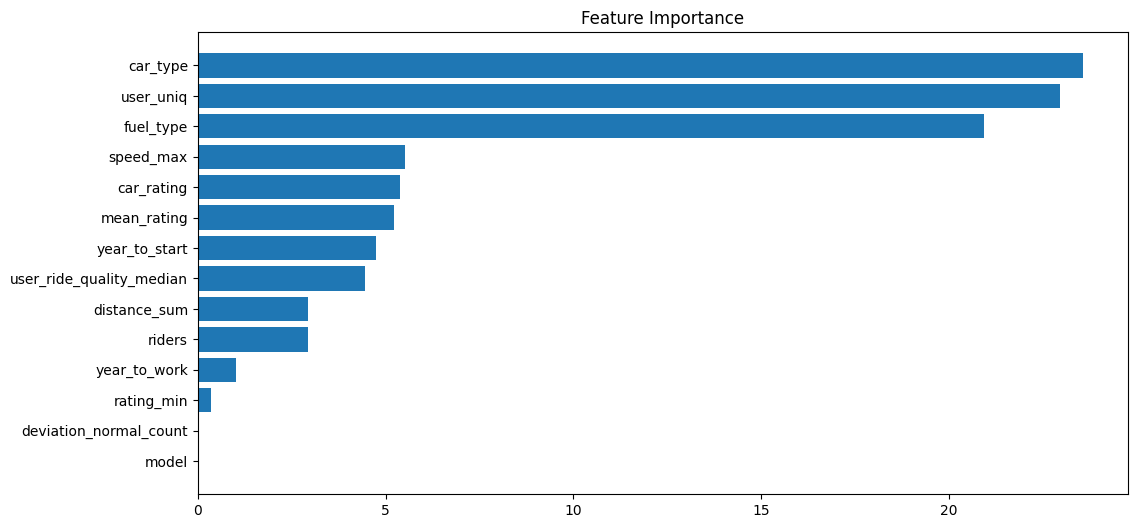

In [50]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.title('Feature Importance');

In [29]:
# Посмотрим на SHAP values
explainer = shap.Explainer(model)
shap_values = explainer(X_test)
shap_importance = shap_values.abs.mean(0).values
sorted_idx = shap_importance.argsort()
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), shap_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.title('SHAP Importance');
fig = plt.figure(figsize=(12, 6))
shap.plots.bar(shap_values, max_display=X_test.shape[0])

NameError: name 'shap' is not defined

# <center> Permutation importance</center>

Text(0.5, 1.0, 'Permutation Importance')

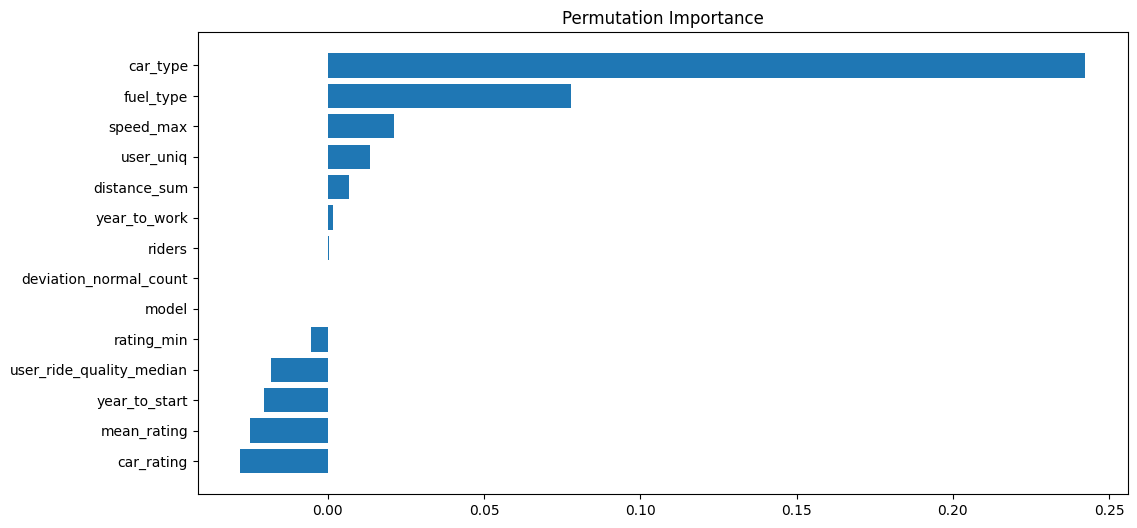

In [51]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=1066)
sorted_idx = perm_importance.importances_mean.argsort()
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.title('Permutation Importance')

## <center>CatBoost feature selection</center>

In [39]:
summary = model.select_features(X_train, y_train, 
                      eval_set=(X_test, y_test),
                      features_for_select='0-16',
                      num_features_to_select=10,
                      steps=5,
                      train_final_model=False,
                      logging_level='Silent')

In [40]:
print(summary['selected_features_names'])
print(f"Best loss: {summary['loss_graph']['loss_values'][-1]}")

['speed_max', 'user_ride_quality', 'deviation_normal', 'car_type', 'fuel_type', 'car_rating', 'year_to_start', 'riders', 'model', 'year_to_work']
Best loss: 1287.2192304910152


In [41]:
summary

{'selected_features': [4, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 'eliminated_features_names': ['distance',
  'refueling',
  'ride_cost',
  'ride_duration',
  'rating',
  'speed_avg',
  'stop_times'],
 'loss_graph': {'main_indices': [0, 2, 3, 5, 6],
  'removed_features_count': [0, 1, 2, 3, 4, 5, 6, 7],
  'loss_values': [1302.2506180353753,
   1283.463476494676,
   1283.463476494676,
   1288.0748227973036,
   1289.6175293477527,
   1300.5117282005622,
   1285.4912682977854,
   1287.2192304910152]},
 'eliminated_features': [6, 7, 2, 1, 0, 3, 5],
 'selected_features_names': ['speed_max',
  'user_ride_quality',
  'deviation_normal',
  'car_type',
  'fuel_type',
  'car_rating',
  'year_to_start',
  'riders',
  'model',
  'year_to_work']}

## <center> Random feature</center>

In [ ]:
# Добавим рандомный признак в датасет
rides_info['random'] = np.random.randint(-200, 200, rides_info.shape[0])

In [ ]:
X = rides_info.drop(drop_cols, axis=1)
y = rides_info['target_reg']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = CatBoostRegressor(cat_features=cat_cols,
                          thread_count=-1)
                         #eval_metric='RMSE')
model.fit(X_train, y_train, 
          eval_set=(X_test, y_test),
          verbose=150, plot=False, 
          early_stopping_rounds=100)

In [ ]:
# посмотрим на важность признаков катбуста
fi = model.get_feature_importance(prettified=True)
fi

## <center> Boruta </center>

<center> <img src="../images/boruta.webp"> </center> 

In [ ]:
#!pip install boruta

In [32]:
X_train_one_hot = pd.get_dummies(X_train[cat_cols])
X_train = pd.concat((X_train.drop(columns=cat_cols), X_train_one_hot), axis=1).fillna(0)
X_train.head()

,rating,ride_duration,ride_cost,speed_avg,speed_max,stop_times,distance,refueling,user_ride_quality,deviation_normal,...,model_Renault Sandero,model_Skoda Rapid,model_Smart Coupe,model_Smart ForFour,model_Smart ForTwo,model_Tesla Model 3,model_VW Polo,model_VW Polo VI,model_VW Tiguan,model_Volkswagen ID.4
57857,4.46,18,192,84,85.973464,0,1556.718120,0,-4.872906,4.504,...,0,0,0,0,0,0,0,0,0,0
238419,3.71,49,679,29,66.000000,1,967.744777,0,-2.425700,-54.926,...,0,0,0,0,0,0,1,0,0,0
412031,1.07,86,683,36,76.000000,4,1755.625619,0,8.889414,-9.398,...,0,0,0,0,0,0,1,0,0,0
192817,7.26,22,170,51,85.000000,1,269.646206,0,2.769013,32.171,...,0,0,1,0,0,0,0,0,0,0
510757,5.69,52,568,45,64.000000,1,2301.098008,0,-11.768922,-5.077,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor
###initialize Boruta
forest = RandomForestRegressor(
   n_jobs = -1, 
   max_depth = 3
)
boruta = BorutaPy(
   estimator = forest, 
   n_estimators = 'auto',
   max_iter = 8, # number of trials to perform
    verbose=1
)
### fit Boruta (it accepts np.array, not pd.DataFrame)
boruta.fit(np.array(X_train), np.array(y_train))
### print results
green_area = X_train.columns[boruta.support_].to_list()
blue_area = X_train.columns[boruta.support_weak_].to_list()
red_area = X_train.columns[~(boruta.support_ | boruta.support_weak_)].to_list()
print('features in the green area:', green_area)
print('features in the blue area:', blue_area)
print('features in the red area:', red_area)

Полезные ссылки:
    https://jundongl.github.io/scikit-feature/ (Python 2.7)